In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.Thomas_Algo import ThomasAlgorithm,create_tridiagonal

In [2]:
def create_matrix(y,x,**kwargs):
    args  = kwargs["args"]
    alpha = args[0]
    
    Nx = len(x)
    dx = x[1]-x[0]
    a  = np.zeros(len(x))
    b  = np.zeros(len(x))
    c  = np.zeros(len(x))
    d  = np.zeros(len(x))
    
    for n in range(1,Nx-1,1):
        a[n] = -alpha
        b[n] = (1+2*alpha)
        c[n] = -alpha
        d[n] = y[n] #dx**2*f(x[n]) #y[n]

    return a,b,c,d

In [3]:
def create_matrix_1(y,x,**kwargs):
    #args  = kwargs["args"]
    #alpha = args[0]
    
    Nx = len(x)
    dx = x[1]-x[0]
    a  = np.zeros(len(x))
    b  = np.zeros(len(x))
    c  = np.zeros(len(x))
    d  = np.zeros(len(x))
    
    for n in range(1,Nx-1,1):
        a[n] = 1
        b[n] = -2
        c[n] = 1
        d[n] = (dx**2)*np.exp(-x[n]**2) #dx**2*f(x[n]) #y[n]

    return a,b,c,d

In [4]:
def Crank_Nicholson(y,x,**kwargs):
    args  = kwargs["args"]
    alpha = args[0]
    
    Nx = len(x)
    dx = x[1]-x[0]
    a  = np.zeros(len(x))
    b  = np.zeros(len(x))
    c  = np.zeros(len(x))
    d  = np.zeros(len(x))
    
    for n in range(1,Nx-1,1):
        a[n] = -0.5*alpha
        b[n] = (1+alpha)
        c[n] = -0.5*alpha
        d[n] = y[n]*(1-alpha) + 0.5*alpha*y[n+1]+0.5*alpha*y[n-1]

    return a,b,c,d

In [5]:
Nx     = 100
xmax   = 10
xmin   = 0
x      = np.linspace(0,xmax-xmin,Nx)
t      = np.linspace(0,1,1001)
sol    = np.zeros((len(t),len(x)))
#sol[0,:] = np.sin(3*np.pi*x/(xmax-xmin))
#sol[0,50] = 1.0
b = 0.01 
sol[0,:]    = (1/np.sqrt(b*np.pi))*np.exp(-((x-5)*(x-5))/b) 
sol_CN = np.zeros((len(t),len(x)))
#sol_CN[0,:] = (1.0/(0.01))*np.exp(((x-5)**2)/0.00001) 
sol_CN[0,:] = (1/np.sqrt(b*np.pi))*np.exp(-((x-5)*(x-5))/b) 
#sol_CN[0,:] = np.sin(3*np.pi*x/(xmax-xmin))
D        = 1.0
dx       = x[1]-x[0]
dt       = t[1]-t[0]
alpha    = D*dt/(dx**2)

In [6]:
for time in range(1,len(t),1): 
    sol[time] = ThomasAlgorithm(create_matrix,sol[time-1],x,args=(alpha,),Left="Dirichlet",Right="Dirichlet")
    #sol_CN[time] = ThomasAlgorithm(create_matrix,sol_CN[time-1],x,args=(alpha,),Left="Dirichlet",Right="Dirichlet")
    sol_CN[time] = ThomasAlgorithm(Crank_Nicholson,sol_CN[time-1],x,args=(alpha,),Left="Dirichlet",Right="Dirichlet")

In [7]:
#print(sol)
ana = np.zeros((len(t),len(x)))
#ana[0,50] = 1.0
#ana[0,:] = (1.0/(0.001))*np.exp(((x-5)**2)/0.00001)
ana[0,:] = (1/np.sqrt(b*np.pi))*np.exp((-(x-5)*(x-5))/b) 
for time in range(1,len(t),1):
    #ana[time] = np.sin(3*np.pi*x/(xmax-xmin))*np.exp(-D*9*np.pi**2*t[time]/((xmax-xmin)*(xmax-xmin)))
    ana[time] = (1.0/np.sqrt(4*np.pi*D*t[time]))*np.exp(-(x-5)*(x-5)/(4*D*t[time]))
#print(ana)

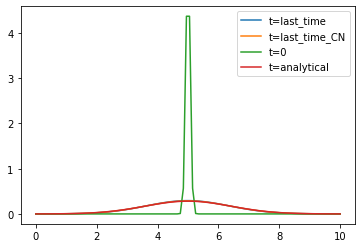

In [8]:
plt.plot(x,sol[-1,:],label='t=last_time')
plt.plot(x,sol_CN[-1,:],label='t=last_time_CN')
plt.plot(x,ana[0,:],label='t=0')
plt.plot(x,ana[-1,:],label='t=analytical')
plt.legend(loc='best')
plt.show()